<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

<hr>

<a href="https://clarusway.com/"><img align="center" src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="450" height="200" alt="CLRSWY_LOGO" title="Open and Execute in Google Colaboratory"></a><br/>

<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<p style="text-align: center;"><img src="https://i.ibb.co/Vp7VhzT/stats.png" class="img-fluid" alt="STATS" width="600" height="200"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#0000FF; font-size:150%; text-align:center; border-radius:10px 10px;">SESSION-06 (Hypothesis Testing About Means)</p>

<hr>

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">Libraries Needed in this Notebook:</p>

First we must import the related libraries of Numpy, Pandas, Matplotlib and Seaborn for our analysis. We are importing the required modules by using the import keyword. 

In [1]:
# Importing reelating libraries; Pandas, Numpy, scipy.stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FFFFFF; font-size:175%; text-align:center; border-radius:10px 10px;">Review of the Previous Session - One Sample t-Test</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>💡🚨📢👉 Performed when the ``population standard deviation`` are ``UNKNOWN`` and sample size is ``less than 30`` ❗❗❗</strong></p>

<img src=https://i.ibb.co/Z1fMJ47/decision-tree.png width="600" height="200">

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Example-01 (One Sample t-Test):</p>

# [One Sample t-Test](https://vitalflux.com/one-sample-t-test-formula-examples/)

In statistics, the t-test is often used in research when the researcher wants to know ``whether there is a significant difference between the mean of sample and the population``, or ``whether there is a significant difference between the means of two different groups`` but we do ``NOT`` have full population information available to us.

The One Sample t-Test compares a sample mean to a hypothesized value for the population mean to determine whether the two means are significantly different. For instance, we may want to know if a particular sample of college students is similar to or different from college students in general.

**[One-Sample t-Test](http://psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/tone.htm)**<br>
**[One Sample T Test - Easily Explained w/ 5+ Examples!](https://calcworkshop.com/hypothesis-test/one-sample-t-test/)**<br>
**[One Sample T Test – Clearly Explained with Examples | ML+](https://www.machinelearningplus.com/statistics/one-sample-t-test/)**<br>
**[How do you find the t-test statistic?](https://www.omnicalculator.com/statistics/t-test)**

<img src=https://i.ibb.co/nsxqsbY/t-formula.png width="600" height="200">

- **According to Reynolds Intellectual Ability Scales, the ``average VIQ`` (Verbal IQ scores based on the four Wechsler (1981) subtests) is about ``109``.**
- **In our sample data, we have a ``sample of 40 cases``.** 
  - **Let's test if the ``average VIQ of people`` is significantly ``bigger than 109``.**

In [2]:
# Brain size and weight and IQ data (Willerman et al. 1991)

df = pd.read_csv("brain_size.csv", sep=";", na_values= ".", index_col=0)

df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 1 to 40
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     40 non-null     object 
 1   FSIQ       40 non-null     int64  
 2   VIQ        40 non-null     int64  
 3   PIQ        40 non-null     int64  
 4   Weight     38 non-null     float64
 5   Height     39 non-null     float64
 6   MRI_Count  40 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.5+ KB


In [4]:
df.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>Given Variables:</strong></p>

In [5]:
x_bar = 112.350000   # Sample mean (replace with actual mean from your data)
mu = 109             # Hypothesized population mean
n = 40               # Sample size
std_dev = 23.616107  # Sample standard deviation (replace with actual value)
alpha = 0.05         # Significance level

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02-03: Calculating Test Statistic & p-value (the t-test for the means of two independent samples of scores):</strong></p>

**Manuel Calculation:**

<img src=https://i.ibb.co/nsxqsbY/t-formula.png width="500" height="200">

In [6]:
# Calculating the mean of VIQ

xbar = df.VIQ.mean()
xbar

112.35

In [7]:
# Calculating the std of VIQ

s = df.VIQ.std()
s

23.616107063199735

In [8]:
s / np.sqrt(df.shape[0])

3.7340343893050596

In [9]:
df.shape

(40, 7)

In [10]:
# Calculating the test statistic

t_test = (xbar - 109)/(s/np.sqrt(df.shape[0]))
t_test

0.8971529586323553

In [11]:
# Calculating p-value

1 - stats.t.cdf(t_test, 39)

0.18757115929257173

**Calculation using ``scipy`` library:**

In [12]:
# Using stats.ttest_1samp() to calculate the test statistic and p-value

oneSamp = stats.ttest_1samp(df.VIQ, 109, alternative='greater')
oneSamp

TtestResult(statistic=0.8971529586323551, pvalue=0.18757115929257173, df=39)

In [13]:
# Displaying test statistic

oneSamp.statistic

0.8971529586323551

In [14]:
# Displaying p-value

oneSamp.pvalue

0.18757115929257173

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [15]:
# Comparing p-value and alpha

alpha = 0.05

if oneSamp.pvalue < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we FAIL to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we FAIL to reject the null hypothesis.


**``Decision:``**

α=0.05 level of significance, we compare the p-value to α:
- Since the p-value (0.188) is greater than 0.05, we ``fail to reject the null hypothesis``.

**``Interpretation of the Decision:``**
- The results indicate that there is NOT enough statistical evidence to support the claim that the average VIQ is significantly greater than 109. This suggests that, based on the sample data, the average VIQ of the individuals in this study is not significantly different from the established average of 109.
- Practically, this means that the sample does not provide sufficient evidence to conclude that the population's average VIQ exceeds the expected average, which may have implications for understanding the cognitive abilities of this group relative to the general population. Further research with a larger sample size or additional variables may be needed to explore this aspect more thoroughly.

**Making a decision comparing ``calculated`` and ``critical`` t scores:**

In [16]:
# Given values
x_bar = 112.35  # Sample mean (replace with actual mean from your data)
mu = 109        # Hypothesized population mean
n = 40          # Sample size
std_dev = 23.616107  # Sample standard deviation (replace with actual value)

# Calculate the t-statistic
t_calculated = (x_bar - mu) / (std_dev / np.sqrt(n))

# Significance level
alpha = 0.05

# Degrees of freedom
dof = n - 1

# Critical t-value for the right-tailed test
t_critical = stats.t.ppf(1 - alpha, dof)  # Use "1-alpha" for right-tailed

# Print the critical t-value and the calculated t-value
print(f'Critical t-value: {t_critical:.4f}')
print(f'Calculated t-value: {t_calculated:.4f}')

# Decision
if t_calculated > t_critical:
    print("Reject the null hypothesis.")
else:
    print("FAIL to reject the null hypothesis.")

Critical t-value: 1.6849
Calculated t-value: 0.8972
FAIL to reject the null hypothesis.


- **``Critical t-value``**: The critical t-value of 1.6849 (for α=0.05 in a right-tailed test with 39 degrees of freedom) represents the threshold for rejecting the null hypothesis. It indicates the point above which we would reject the null hypothesis if our calculated t-statistic were to fall into that region.

- **``Calculated t-Statistic``**: The calculated t-statistic of approximately 0.8972 is less than the critical t-value of 1.6849. This means it does NOT fall into the rejection region, indicating that the sample mean is NOT significantly greater than the hypothesized population mean.

- **``Decision Rule:``**
  - **``Right-Tailed Test``**: In a right-tailed test, you reject the null hypothesis if your calculated t-statistic is greater than the critical t-value. 
    - Since the critical t-value is 1.6849 and the calculated t-statistic is approximately 0.8972, you fail to reject the null hypothesis. This means there is not enough evidence to support the claim that the population mean is greater than 109 at the 0.05 significance level.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Visualizing the results:</strong></p>

Critical t-value: 1.6849
Calculated t-value: 0.8972
Fail to reject the null hypothesis.


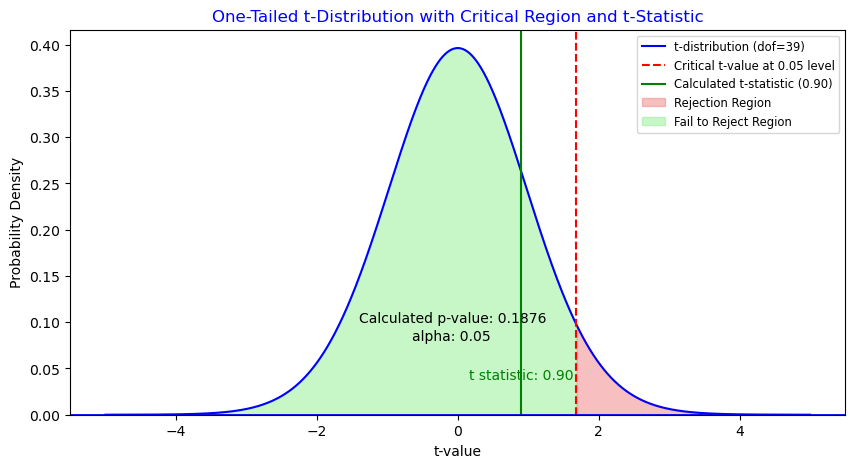

In [17]:
# Given values from your t-test
t_statistic = 0.8972  # Calculated t-statistic
p_value = 0.1876      # p-value from the t-test
dof = n - 1           # Degrees of freedom (39)
alpha = 0.05          # Significance level
alpha = 0.05          # Significance level

# Critical t-value for the right-tailed test
t_critical = stats.t.ppf(1-alpha, dof)  # Use "1-alpha" for right-tailed

# Print the critical t-value and the calculated t-value
print(f'Critical t-value: {t_critical:.4f}')
print(f'Calculated t-value: {t_calculated:.4f}')

# Decision
if t_calculated > t_critical:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

# Define the range for the t-distribution plot
x = np.linspace(-5, 5, 1000)

# Calculate the t-distribution
y = t.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (dof={dof})', color='blue')

# Mark the critical t-value for alpha (one-tailed test)
t_critical = t.ppf(1 - alpha, dof)
plt.axvline(t_critical, color='red', linestyle='--', label=f'Critical t-value at {alpha} level')

# Mark the calculated t-statistic
plt.axvline(t_statistic, color='green', linestyle='-', label=f'Calculated t-statistic ({t_statistic:.2f})')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the rejection region with light red
plt.fill_between(x, 0, y, where=(x >= t_critical), color='lightcoral', alpha=0.5, label='Rejection Region')

# Fill the fail to reject area with light green
plt.fill_between(x, 0, y, where=(x < t_critical), color='lightgreen', alpha=0.5, label='Fail to Reject Region')

# Add text for p-value and alpha
plt.text(0-1.4, 0.1, f'Calculated p-value: {p_value:.4f}', fontsize=10)
plt.text(-0.65, 0.08, f'alpha: {alpha}', fontsize=10)
plt.text(t_statistic, 0.05, f't statistic: {t_statistic:.2f}', color='green', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('One-Tailed t-Distribution with Critical Region and t-Statistic', color='blue')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>🤔💭 What if it was two-tailed hypothesis?</strong></p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>Let's remember the given Variables:</strong></p>

In [18]:
x_bar = 112.350000   # Sample mean (replace with actual mean from your data)
mu = 109             # Hypothesized population mean
n = 40               # Sample size
std_dev = 23.616107  # Sample standard deviation (replace with actual value)
alpha = 0.05         # Significance level
dof = n - 1          # # Degrees of freedom

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>Visualize the results:</strong></p>

Critical t-value (low): -2.0227
Critical t-value (high): 2.0227
Calculated t-value: 0.8972
Fail to reject the null hypothesis.


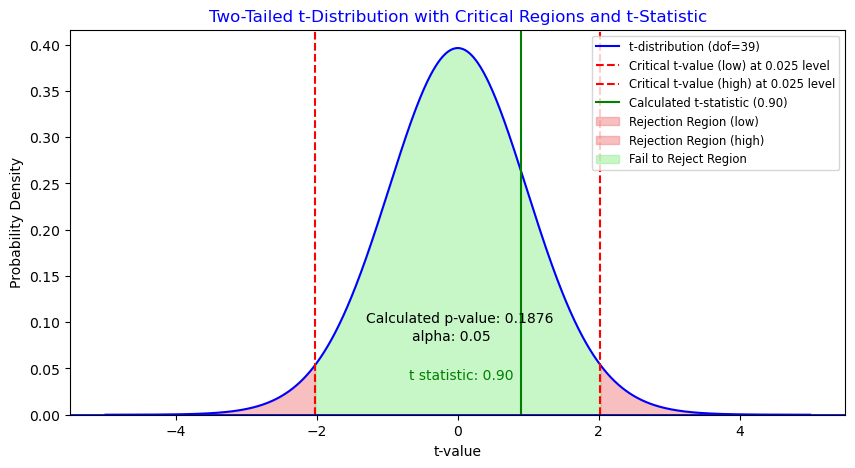

In [19]:
# Calculate the t-statistic
t_calculated = (x_bar - mu) / (std_dev / np.sqrt(n))

# Critical t-values for the two-tailed test
t_critical_low = stats.t.ppf(alpha / 2, dof)    # Lower critical value
t_critical_high = stats.t.ppf(1 - alpha / 2, dof)  # Upper critical value

# Print the critical t-values and the calculated t-value
print(f'Critical t-value (low): {t_critical_low:.4f}')
print(f'Critical t-value (high): {t_critical_high:.4f}')
print(f'Calculated t-value: {t_calculated:.4f}')

# Decision
if t_calculated < t_critical_low or t_calculated > t_critical_high:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

# Visualization
# Define the range for the t-distribution plot
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (dof={dof})', color='blue')

# Mark the critical t-values for alpha (two-tailed test)
plt.axvline(t_critical_low, color='red', linestyle='--', label=f'Critical t-value (low) at {alpha/2} level')
plt.axvline(t_critical_high, color='red', linestyle='--', label=f'Critical t-value (high) at {alpha/2} level')

# Mark the calculated t-statistic
plt.axvline(t_calculated, color='green', linestyle='-', label=f'Calculated t-statistic ({t_calculated:.2f})')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the rejection regions
plt.fill_between(x, 0, y, where=(x <= t_critical_low), color='lightcoral', alpha=0.5, label='Rejection Region (low)')
plt.fill_between(x, 0, y, where=(x >= t_critical_high), color='lightcoral', alpha=0.5, label='Rejection Region (high)')

# Fill the non-rejection area with light green
plt.fill_between(x, 0, y, where=(x > t_critical_low) & (x < t_critical_high), color='lightgreen', alpha=0.5, label='Fail to Reject Region')

# Add text for p-value and alpha
plt.text(-1.3, 0.1, f'Calculated p-value: {p_value:.4f}', fontsize=10)
plt.text(-0.65, 0.08, f'alpha: {alpha}', fontsize=10)
plt.text(t_statistic-0.85, 0.05, f't statistic: {t_statistic:.2f}', color='green', fontsize=10, ha='center', va='top')


# Add titles and labels
plt.title('Two-Tailed t-Distribution with Critical Regions and t-Statistic', color='blue')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FFFFFF; font-size:175%; text-align:center; border-radius:10px 10px;">A - Independent Samples t-Test</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>💡🚨📢👉 Compares the means of ``two independent groups`` ❗❗❗</strong></p>

## [Independent Samples t-Test](https://libguides.library.kent.edu/spss/independentttest#:~:text=The%20Independent%20Samples%20t%20Test%20compares%20the%20means%20of%20two,Independent%20t%20Test)

The Independent Samples t-Test ``compares the means of two independent groups`` in order to determine ``whether there is statistical evidence that the associated population means are significantly different``. The Independent Samples t Test is a parametric test. This test is also known as: Independent t-Test.

**Common Uses:**<br>
The Independent Samples t Test is commonly used to test the following:

- Statistical differences between the means of two groups
- Statistical differences between the means of two interventions
- Statistical differences between the means of two change scores

``Note:`` The Independent Samples t-Test can only compare the means for two (and only two) groups. It CANNOT make comparisons among more than two groups. If you wish to compare the means across more than two groups, you will likely want to run an ANOVA.

**Hypotheses:**<br>
The null hypothesis (H0) and alternative hypothesis (H1) of the Independent Samples t Test can be expressed in two different but equivalent ways:

- ``H0: µ1 = µ2 ("the two population means are equal")``
- ``H1: µ1 ≠ µ2 ("the two population means are not equal")``

OR

- ``H0: µ1 - µ2 = 0 ("the difference between the two population means is equal to 0")``
- ``H1: µ1 - µ2 ≠ 0 ("the difference between the two population means is not 0")``

where ``µ1`` and ``µ2`` are the ``population means`` for group 1 and group 2, respectively. Notice that the second set of hypotheses can be derived from the first set by simply subtracting µ2 from both sides of the equation.

**[Independent Samples T Test: Definition, Using & Interpreting](https://statisticsbyjim.com/hypothesis-testing/independent-samples-t-test/)**<br>
**[Independent Samples T-Test](https://www.statstest.com/independent-samples-t-test/)**<br>
**[Independent T-test Assumptions, Interpretation, and Write Up](https://usq.pressbooks.pub/statisticsforresearchstudents/chapter/independent-t-test-assumptions/)**<br>
**[What is an Independent Samples T-Test?](https://www.statstest.com/independent-samples-t-test/)**

<img src=https://i.ibb.co/LdStjpb/testa-diagram.jpg width="700" height="200">

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Example-01 (Independent Samples t-Test):</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:red;">Hypothetical Scenario:</span> <span style="color:green;">Temperature Measurement in Different Genders</span>.
</p>

- **``Context``**: A health research team is investigating whether there is a ``significant difference`` in ``average body temperature`` between ``men`` and ``women``. This study is part of a larger effort to understand physiological differences that may affect health outcomes. The researchers collected body temperature data from a sample of men and women in a local community.

In [20]:
men = [96.9, 97.4, 97.5, 97.8, 97.8, 97.9, 98, 98.6, 98.8]
women = [97.8, 98, 98.2, 98.2, 98.2, 98.6, 98.8, 99.2, 99.4]

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01: Checking the Assumptions:</strong></p>

   - <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left; font-weight: bold;">🔔📢👉 Reminder: Always check the following assumptions step by step before performing statistical tests.</p><br>  


- The two-samples independent t-test assumes the following characteristics about the data:

  - ``Independence of the observations``. Each subject should belong to only one group. There is no relationship between the observations in each group.
  - ``No significant outliers in the two groups``
  - ``Normality``. the data for each group should be approximately normally distributed.
  - **``Homogeneity of variances``**. the variance of the outcome variable should be equal in each group.

**The following code applies the independent samples t-test for comparing the ``body temperatures`` of ``men`` and ``women``, let’s conduct the independent samples t-test step-by-step.**

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02 Checking the Homogeneity of Variances:</strong></p>

**``Levene's Test Hypothesis:``**
- ``H0: The population variances are equal``.
- ``H1: There is a difference between the variances in the population``.

In [21]:
# Performing Levene test for equal variances

# The small p-value suggests that the populations do NOT have equal variances.(equal_var=False)
# The large p-value suggests that the populations have equal variances.(equal_var=True) 

leveneTest = stats.levene(men, women)
leveneTest

# The small p-value suggests that the populations do not have equal variances.

LeveneResult(statistic=0.0031923383878696503, pvalue=0.9556424422138867)

**``Levene's Test Interpretation:``**
- The Levene's Test checks for the equality of variances between the two groups.
- **``P-value``**: **``0.9556``** is much greater than the significance level (α = 0.05), indicating that we fail to reject the null hypothesis for homogeneity of variances. This suggests that the ``variances of body temperatures`` in ``men`` and ``women`` are ``equal``.

**[What is levene's test:](https://en.wikipedia.org/wiki/Levene%27s_test)**

In statistics, Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups, a condition known as homogeneity of variances. 
It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity). If the resulting p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances. Thus, the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population.

However, the robustness of the t-test to violations of this assumption can vary.

**``Key Points on Robustness:``**
- **``Equal Variances (Homogeneity):``**
   - If the variances of the two groups are equal, the independent samples t-test provides reliable results.
- **``Unequal Variances (Heterogeneity):``**
   - If the variances are not equal, the standard independent samples t-test can still be used, but it may lead to inaccurate results, particularly with smaller sample sizes.
   - The test is generally considered robust to moderate violations of the homogeneity of variances assumption, especially when sample sizes are large (n > 30 for each group). In such cases, the central limit theorem helps mitigate issues related to unequal variances.

**``Welch’s t-Test:``**
- When the assumption of equal variances is violated, it is advisable to use Welch’s t-test. This test is a variation of the t-test that does not assume equal variances and is more reliable when there are differences in variability between the groups.

**``Practical Considerations:``**
- **``Testing for Homogeneity``**: Before conducting an independent samples t-test, it is good practice to test for homogeneity of variances using Levene’s test or Bartlett’s test.
- **``Interpreting Results``**: If Levene’s test indicates significant differences in variances, it is better to use Welch’s t-test for more accurate results.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-03: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

In [22]:
# average men body temperature

np.mean(men)

97.85555555555555

In [23]:
# average women body temperature

np.mean(women)

98.48888888888888

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Calculating Test Statistic & p-value (the t-test for the means of two independent samples of scores):</strong></p>

**Conduct Independent Samples t-Test:**

In [24]:
# help(stats.ttest_ind)

In [25]:
# Calculating test statistics using stats.ttest_ind()

indTest = stats.ttest_ind(men, women, equal_var=True)
indTest

TtestResult(statistic=-2.3724271468993643, pvalue=0.03054788637798765, df=16.0)

**Test Statistic:**

In [26]:
test_statistic = indTest.statistic
test_statistic

-2.3724271468993643

**P Value:**

In [27]:
p_value = indTest.pvalue
p_value

0.03054788637798765

**``T-Test Interpretation:``**
- The **``p-value``** (**``0.03054788637798765``**) is **``less than 0.05``**, which leads us to ``reject the null hypothesis`` regarding the means of the two groups.
- The **``negative t-statistic``** (**``-2.3724271468993643``**) indicates that the ``mean body temperature`` of ``men`` is significantly lower than that of women.
   - In a two-sample t-test, the t-statistic measures ``how many standard deviations the difference between the sample means is from the hypothesized difference`` (which is usually zero when testing for equality).
   - A ``negative t-statistic`` indicates that the ``mean`` of the ``first group`` (in this case, men) is ``less`` than the ``mean`` of the ``second group`` (women).
     - The negative t-statistic indicates that ``men have a significantly lower mean body temperature compared to women``.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [28]:
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the Null Hypothesis (H0) in favor of Alternative Hypothesis. At the α=0.05, we have sufficient evidence to indicate that mean body temperatures differ for men and women.")
else:
    print("FAIL to reject the Null hypothesis (H0).")

Reject the Null Hypothesis (H0) in favor of Alternative Hypothesis. At the α=0.05, we have sufficient evidence to indicate that mean body temperatures differ for men and women.


**``One Sample t-Test Result Interpretation:``**
- We reject the null hypothesis (H0); this indicates that the t-test has provided sufficient evidence to conclude that ``there is a significant difference in mean body temperatures between men and women``.

**``Conclusion:``**
- At the 0.05 level of significance, we can assert the following:
    - **``Significant Difference``**: There is a statistically significant difference in mean body temperatures between men and women, as indicated by the rejection of the null hypothesis.
   - **``Implications``**: This result implies that the average body temperature for men is significantly different from that of women, which could have implications in medical and health-related fields.

**Making a decision comparing ``calculated`` and ``critical`` t scores:**

In [29]:
# Calculate means and standard deviations
mean_men = np.mean(men)
mean_women = np.mean(women)
std_dev_men = np.std(men, ddof=1)  # Sample standard deviation
std_dev_women = np.std(women, ddof=1)  # Sample standard deviation
n_men = len(men)
n_women = len(women)

# Calculate the t-statistic for independent samples
t_calculated = (mean_men - mean_women) / np.sqrt((std_dev_men**2 / n_men) + (std_dev_women**2 / n_women))

# Significance level
alpha = 0.05

# Degrees of freedom
dof = n_men + n_women - 2

# Critical t-value for the two-tailed test
t_critical_low = stats.t.ppf(alpha / 2, dof)    # Lower critical value
t_critical_high = stats.t.ppf(1 - alpha / 2, dof)  # Upper critical value

# Print the critical t-values and the calculated t-value
print(f'Critical t-value (low): {t_critical_low:.4f}')
print(f'Critical t-value (high): {t_critical_high:.4f}')
print(f'Calculated t-value: {t_calculated:.4f}')

# Decision
if t_calculated < t_critical_low or t_calculated > t_critical_high:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Critical t-value (low): -2.1199
Critical t-value (high): 2.1199
Calculated t-value: -2.3724
Reject the null hypothesis.


- **``The critical t-values are:``**
  - Lower Critical t-value: -2.1199
  - Upper Critical t-value: 2.1199

These critical t-values represent the thresholds for rejecting the null hypothesis at the 0.05 significance level for a two-tailed test with 39 degrees of freedom. Values falling outside this range indicate significant differences between the sample means.

- **``Calculated t-Statistic:``**
  - The calculated t-statistic is approximately -2.3724. This value is less than the lower critical t-value of -2.1199. This means that the calculated t-statistic falls into the rejection region on the left side of the distribution.

- **``Decision Rule:``**
  - For a two-tailed test, we reject the null hypothesis if the calculated t-statistic is less than the lower critical t-value or greater than the upper critical t-value.

- **``Rejection Region: ``**
  - ``t<−2.1199 or t>2.1199``
    - Since the calculated t-statistic of -2.3724 is less than the lower critical t-value of -2.1199, we reject the null hypothesis. This indicates that there is enough evidence to suggest that there is a significant difference in mean body temperatures between men and women at the 0.05 significance level.

- **``Conclusion"``**
  - In conclusion, the results suggest that the average body temperature of the two groups is significantly different, which may have implications for physiological studies relating to health outcomes.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-06: Visualizing the results:</strong></p>

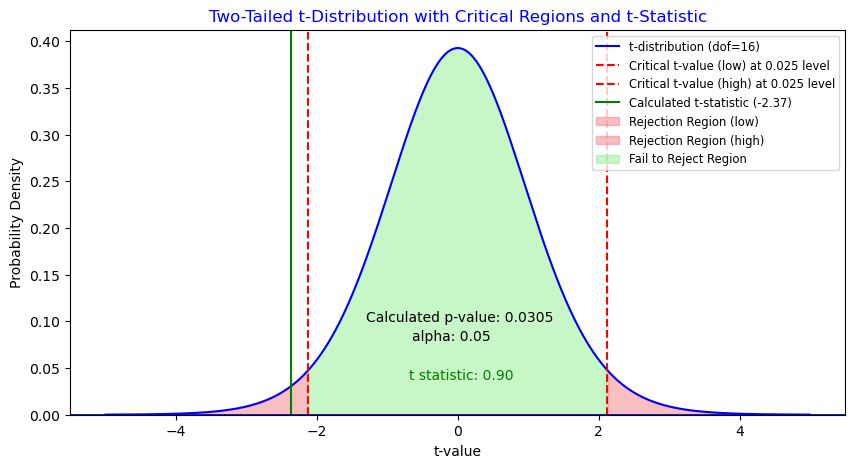

In [30]:
# Given values from your t-test
t_critical_low = -2.1199
t_critical_high = 2.1199
t_calculated = -2.3724
p_value = 0.03054788637798765
dof = 16
alpha = 0.05

# Define the range for the t-distribution plot
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (dof={dof})', color='blue')

# Mark the critical t-values for alpha (two-tailed test)
plt.axvline(t_critical_low, color='red', linestyle='--', label=f'Critical t-value (low) at {alpha/2} level')
plt.axvline(t_critical_high, color='red', linestyle='--', label=f'Critical t-value (high) at {alpha/2} level')

# Mark the calculated t-statistic
plt.axvline(t_calculated, color='green', linestyle='-', label=f'Calculated t-statistic ({t_calculated:.2f})')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the rejection regions
plt.fill_between(x, 0, y, where=(x <= t_critical_low), color='lightcoral', alpha=0.5, label='Rejection Region (low)')
plt.fill_between(x, 0, y, where=(x >= t_critical_high), color='lightcoral', alpha=0.5, label='Rejection Region (high)')

# Fill the fail to reject area with light green
plt.fill_between(x, 0, y, where=(x > t_critical_low) & (x < t_critical_high), color='lightgreen', alpha=0.5, label='Fail to Reject Region')

# Add text for p-value and alpha
plt.text(-1.3, 0.1, f'Calculated p-value: {p_value:.4f}', fontsize=10)
plt.text(-0.65, 0.08, f'alpha: {alpha}', fontsize=10)
plt.text(t_statistic-0.85, 0.05, f't statistic: {t_statistic:.2f}', color='green', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('Two-Tailed t-Distribution with Critical Regions and t-Statistic', color='blue')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Example-02 (Independent Samples t-Test):</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:red;">Scenario:</span> <span style="color:green;">Arsenic Levels in Water Supplies</span>.
</p>

- **``Context``**: A public health study aims to compare arsenic levels in drinking water between urban areas (Metro Phoenix) and rural areas (Rural Arizona) in Arizona. The researchers want to determine if there is a significant difference in arsenic levels between these two regions.

In [31]:
# Importing arsenic dataset

arsenic = pd.read_csv("arsenic.csv")
arsenic

,Metro Phoenix,x1,Rural Arizona,x2
0,Phoenix,3,Rimrock,48
1,Chandler,7,Goodyear,44
2,Gilbert,25,New River,40
3,Glendale,10,Apache Junction,38
4,Mesa,15,Buckeye,33
5,Paradise Valley,6,Nogales,21
6,Peoria,12,Black Canyon City,20
7,Scottsdale,25,Sedona,12
8,Tempe,15,Payson,1
9,Sun City,7,Casa Grande,18


In [32]:
arsenic.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,10.0,12.5,7.633988,3.0,7.0,11.0,15.0,25.0
x2,10.0,27.5,15.349629,1.0,18.5,27.0,39.5,48.0


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>Given Variables:</strong></p>

In [33]:
# Urban Areas (Metro Phoenix)
mean_urban = arsenic["x1"].mean()    # Sample mean for urban areas
std_dev_urban = arsenic["x1"].std()  # Sample standard deviation for urban areas
n_urban = len(arsenic["x1"])         # Sample size for urban areas

# Rural Areas (Rural Arizona)
mean_rural = arsenic["x2"].mean()    # Sample mean for rural areas
std_dev_rural = arsenic["x2"].std()  # Sample standard deviation for rural areas
n_rural = len(arsenic["x2"])         # Sample size for rural areas

# Summary of variables
x_bar_urban = mean_urban  # Sample mean for urban areas
x_bar_rural = mean_rural  # Sample mean for rural areas
n = n_urban + n_rural     # Total sample size
alpha = 0.05              # Significance level

# Sample sizes for each group
n_urban = len(arsenic["x1"])  # Urban areas
n_rural = len(arsenic["x2"])  # Rural areas
# Calculate degrees of freedom
dof = (n_urban + n_rural) - 2

# For reporting
print(f'Urban Mean (x_bar): {x_bar_urban:.6f}')
print(f'Rural Mean (x_bar): {x_bar_rural:.6f}')
print(f'Urban Std Dev: {std_dev_urban:.6f}')
print(f'Rural Std Dev: {std_dev_rural:.6f}')
print(f'Total Sample Size (n): {n}')
print(f'Degrees of Fredom: {dof}')
print(f'Significance Level (alpha): {alpha}')

Urban Mean (x_bar): 12.500000
Rural Mean (x_bar): 27.500000
Urban Std Dev: 7.633988
Rural Std Dev: 15.349629
Total Sample Size (n): 20
Degrees of Fredom: 18
Significance Level (alpha): 0.05


<hr>

**The following code applies the ``independent samples t-test`` for analyzing the arsenic concentration in public drinking water supplies between metropolitan Phoenix and rural Arizona; let’s conduct the independent samples t-test step-by-step.**

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01 Checking the Homogeneity of Variances:</strong></p>

**``Levene's Test Hypothesis:``**
- H0: The population variances are equal.
- H1: There is a difference between the variances in the population

In [34]:
# Performing Levene test for equal variances:

leveneTest = stats.levene(arsenic.x1, arsenic.x2)
leveneTest

# The small p-value suggests that the populations do not have equal variances.

LeveneResult(statistic=7.7015516672169, pvalue=0.012482954069299166)

**``Levene's Test Interpretation:``**
- The p-value for Levene's test (0.0125) is less than 0.05, indicating that we reject the null hypothesis for homogeneity of variances. This suggests that the variances of arsenic concentrations in the two groups are significantly different.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

In [35]:
# Average arsenic in Metro Phoenix

arsenic.x1.mean()

12.5

In [36]:
# Average arsenic in Rural Arizona

arsenic.x2.mean()

27.5

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-03: Calculating Test Statistic (the t-test for the means of two independent samples of scores):</strong></p>

**Conduct Independent Samples t-Test:**

In [37]:
# Calculating test statistics using stats.ttest_ind()

indTest = stats.ttest_ind(arsenic.x1, arsenic.x2, equal_var=False)
indTest

TtestResult(statistic=-2.7669395785560553, pvalue=0.0158272848161009, df=13.19556427423346)

**Test Statistic:**

In [38]:
test_statistic = indTest.statistic
test_statistic

-2.7669395785560553

**P Value:**

In [39]:
p_value = indTest.pvalue
p_value

0.0158272848161009

**``T-Test Interpretation:``**
- The p-value for the t-test (0.0158) is also less than 0.05, which indicates that we reject the null hypothesis regarding the means of the two groups.
- The negative t-statistic (-2.7669) suggests that the mean arsenic concentration in metropolitan Phoenix is lower than in rural Arizona.
   - The t-statistic indicates how many standard deviations the sample mean of one group (in this case, metropolitan Phoenix) is from the hypothesized mean (which, in this context, could be the mean of rural Arizona if we are comparing the two groups).
   - A negative t-statistic generally means that the sample mean of the first group (metropolitan Phoenix) is less than the sample mean of the second group (rural Arizona).
     - If the t-statistic is negative, it indicates that the mean for the first group (metropolitan Phoenix) is lower than that of the second group (rural Arizona).
     - Conversely, if the t-statistic were positive, it would suggest that the mean for metropolitan Phoenix is higher than that of rural Arizona.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [40]:
alpha = 0.05

if indTest.pvalue < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we FAIL to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


**``One Sample t-Test Result Interpretation:``**

- **``Rejecting the Null Hypothesis``**: At the 0.05 level of significance, we reject the null hypothesis, indicating that there is a statistically significant difference in arsenic concentrations between metropolitan Phoenix and rural Arizona.

**``Interpretation of the Decision:``**
- The results imply that the average arsenic concentration in one of the groups (likely rural Arizona, given the negative t-statistic) is significantly different from that in metropolitan Phoenix. This finding raises potential health concerns regarding arsenic exposure in drinking water, particularly in the area with higher concentrations.
- Public health officials may need to investigate further and consider measures to address the potential risks associated with arsenic in drinking water supplies, especially in the rural communities.

**``Wrap up:``**
- In summary, the analysis indicates that there is a significant difference in arsenic concentrations in drinking water between metropolitan and rural areas, with implications for public health and safety.

**Making a decision comparing ``calculated`` and ``critical`` t scores:**

In [41]:
# # Urban Areas (Metro Phoenix)
# mean_urban = arsenic["x1"].mean()    # Sample mean for urban areas
# std_dev_urban = arsenic["x1"].std()  # Sample standard deviation for urban areas
# n_urban = len(arsenic["x1"])         # Sample size for urban areas

# # Rural Areas (Rural Arizona)
# mean_rural = arsenic["x2"].mean()    # Sample mean for rural areas
# std_dev_rural = arsenic["x2"].std()  # Sample standard deviation for rural areas
# n_rural = len(arsenic["x2"])         # Sample size for rural areas

# # Summary of variables
# x_bar_urban = mean_urban  # Sample mean for urban areas
# x_bar_rural = mean_rural  # Sample mean for rural areas
# n = n_urban + n_rural     # Total sample size
# alpha = 0.05              # Significance level

# # Sample sizes for each group
# n_urban = len(arsenic["x1"])  # Urban areas
# n_rural = len(arsenic["x2"])  # Rural areas
# # Calculate degrees of freedom
# dof = (n_urban + n_rural) - 2

In [42]:
# Calculate means and standard deviations
mean_urban = arsenic["x1"].mean()    # Sample mean for urban areas
mean_rural = arsenic["x2"].mean()    # Sample mean for rural areas
std_dev_urban = arsenic["x1"].std()  # Sample standard deviation for urban areas
std_dev_rural = arsenic["x2"].std()  # Sample standard deviation for rural areas
n_urban = len(arsenic["x1"])         # Sample size for urban areas
n_rural = len(arsenic["x2"])         # Sample size for rural areas

# Calculate the t-statistic for independent samples
t_calculated = (mean_urban - mean_rural) / np.sqrt((std_dev_urban**2 / n_urban) + (std_dev_rural**2 / n_rural))

dof = n_urban + n_rural - 2
t_critical_low = stats.t.ppf(alpha / 2, dof)       # Lower critical value
t_critical_high = stats.t.ppf(1 - alpha / 2, dof)  # Upper critical value

# Print the critical t-values and the calculated t-value
print(f'Critical t-value (low): {t_critical_low:.4f}')
print(f'Critical t-value (high): {t_critical_high:.4f}')
print(f'Calculated t-value: {t_calculated:.4f}')
print(f'Degrees of Freedom (dof): {dof}')
print(f'Alpha (significance level): {alpha}')

# Decision
if t_calculated < t_critical_low or t_calculated > t_critical_high:
    print("Reject the null hypothesis.")
else:
    print("FAIL to reject the null hypothesis.")

Critical t-value (low): -2.1009
Critical t-value (high): 2.1009
Calculated t-value: -2.7669
Degrees of Freedom (dof): 18
Alpha (significance level): 0.05
Reject the null hypothesis.


- **``The critical t-values are:``**
  - **``Lower Critical t-value``**: tcritical low
  - **``Upper Critical t-value``**: tcritical high
 
    - These critical t-values represent the thresholds for rejecting the null hypothesis at the 0.05 significance level for a two-tailed test with (n₁ + n₂ - 2) degrees of freedom. Values falling outside this range indicate significant differences between the sample means.

- **``Calculated t-Statistic:``**
  - The calculated t-statistic is approximately (t_calculated). This value is less than the lower critical t-value of (t_critical_low). This means that the calculated t-statistic falls into the rejection region on the left side of the distribution.

- **``Decision Rule:``**
  - For a two-tailed test, we reject the null hypothesis if the calculated t-statistic is less than the lower critical t-value or greater than the upper critical t-value.

    - Rejection Region: ``t < tcritical low``  or ``t > tcritical high``
  - Since the calculated t-statistic of (t_calculated) is less than the lower critical t-value of (t_critical_low), we reject the null hypothesis. This indicates that there is enough evidence to suggest that there is a significant difference in arsenic levels between urban and rural areas at the 0.05 significance level.

- **``Conclusion:``**
  - In conclusion, the results suggest that the average arsenic levels in drinking water between urban and rural areas differ significantly, which may have important implications for public health policies and water quality standards in Arizona.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Visualizing the results:</strong></p>

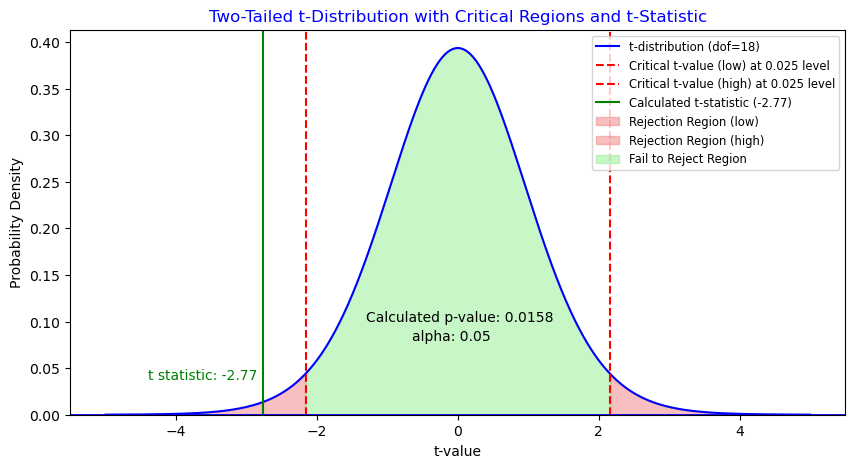

In [43]:
# Given values from your t-test
t_critical_low = -2.160  # Example critical t-value from calculations
t_critical_high = 2.160  # Example critical t-value from calculations
t_calculated = -2.7669   # Calculated t-value
p_value = 0.0158         # Given p-value from the t-test
dof = 18                 # Approximated degrees of freedom
alpha = 0.05             # Significance level

# Define the range for the t-distribution plot
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (dof={dof})', color='blue')

# Mark the critical t-values for alpha (two-tailed test)
plt.axvline(t_critical_low, color='red', linestyle='--', label=f'Critical t-value (low) at {alpha/2} level')
plt.axvline(t_critical_high, color='red', linestyle='--', label=f'Critical t-value (high) at {alpha/2} level')

# Mark the calculated t-statistic
plt.axvline(t_calculated, color='green', linestyle='-', label=f'Calculated t-statistic ({t_calculated:.2f})')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the rejection regions
plt.fill_between(x, 0, y, where=(x <= t_critical_low), color='lightcoral', alpha=0.5, label='Rejection Region (low)')
plt.fill_between(x, 0, y, where=(x >= t_critical_high), color='lightcoral', alpha=0.5, label='Rejection Region (high)')

# Fill the fail to reject area with light green
plt.fill_between(x, 0, y, where=(x > t_critical_low) & (x < t_critical_high), color='lightgreen', alpha=0.5, label='Fail to Reject Region')

# Add text for p-value and alpha
plt.text(-1.3, 0.1, f'Calculated p-value: {p_value:.4f}', fontsize=10)
plt.text(-0.65, 0.08, f'alpha: {alpha}', fontsize=10)
plt.text(t_calculated - 0.85, 0.05, f't statistic: {t_calculated:.2f}', color='green', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('Two-Tailed t-Distribution with Critical Regions and t-Statistic', color='blue')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FFFFFF; font-size:175%; text-align:center; border-radius:10px 10px;">B - Paired (Dependent) Samples t-Test</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>💡🚨📢👉 Compares the means of two measurements from same source over the time or at different conditions or etc. ❗❗❗</strong></p>

## [Paired (Dependent) Samples T-Test](https://libguides.library.kent.edu/SPSS/PairedSamplestTest)

The Paired Samples t-Test ``compares the means of two measurements taken from the same individual, object, or related units``. These "paired" measurements can represent things like:
- A ``measurement`` taken at ``two different times`` (e.g., pre-test and post-test score with an intervention administered between the two time points)
- A ``measurement`` taken ``under two different conditions`` (e.g., completing a test under a "control" condition and an "experimental" condition)
- ``Measurements`` taken from ``two halves or sides of a subject or experimental unit`` (e.g., measuring hearing loss in a subject's left and right ears).

The ``purpose`` of the test is to ``determine whether there is statistical evidence that the mean difference between paired observations is significantly different from zero``. The Paired Samples t Test is a parametric test.

This test is also known as:
- ``Dependent t-Test``
- ``Paired t-Test``
- ``Repeated Measures t-Test``

**Hypotheses:**

The hypotheses can be expressed in two different ways that express the same idea and are mathematically equivalent:
- ``H0: µ1 = µ2 ("the paired population means are equal")``
- ``H1: µ1 ≠ µ2 ("the paired population means are not equal")``

OR
- ``H0: µ1 - µ2 = 0 ("the difference between the paired population means is equal to 0")``
- ``H1: µ1 - µ2 ≠ 0 ("the difference between the paired population means is not 0")``

where
- ``µ1`` is the ``population mean of variable 1``, and
- ``µ2`` is ``the population mean of variable 2``.

**[How to use Python to Perform a Paired Sample T-test](https://www.marsja.se/how-to-use-python-to-perform-a-paired-sample-t-test/)**<br>


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 The Dependent (or Paired) t-test is based on the assumption that the differences between pairs of observations are <span style="color:red;">normally distributed</span>, and <span style="color:red;">NOT specifically on the assumption of homogeneity of variance</span> within each group. However, it's good practice to check the <span style="color:red;">variances for similarity when working with small samples</span>. If the variances are significantly different, we can consider using the <span style="color:red;">Welch's t-test</span>, which does not require <span style="color:red;">homogeneity of variance assumption</span>.
</p>

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Example-01 (Paired (Dependent) Samples t-Test):</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:red;">Hypothetical Scenario:</span> <span style="color:green;">Comparing Strength Prediction Methods</span>.
</p>
    
- **``Context``**: A materials science research team is investigating the effectiveness of two different methods for predicting the strength of a new composite material. The team conducts an experiment to assess the strength predictions generated by the Karlsruhe method and the Lehigh method.

- The experiment involves testing samples using both methods, and the results are measured in megapascals (MPa). The goal is to determine if there is a statistically significant difference in the strength predictions between the two methods.

In [44]:
karlsruhe = [1.186, 1.151, 1.322, 1.339, 1.2, 1.402, 1.365, 1.537, 1.559]
lehigh = [1.061, 0.992, 1.063, 1.062, 1.065, 1.178, 1.037, 1.086, 1.052] 

**Checking the Assumptions:**

The paired (dependent) t-test assumes the following characteristics about the data:
- The dependent variable must be continuous (interval/ratio).
- The observations are independent of one another.
- The dependent variable should be approximately normally distributed.
- The dependent variable should not contain any outliers.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

In [45]:
# Average in karlsruhe method

np.mean(karlsruhe)

1.3401111111111108

In [46]:
# Average in lehigh method

np.mean(lehigh)

1.0662222222222222

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02: Calculating Test Statistic & p-value (the t-test for the means of two dependent (Paired) samples of scores):</strong></p>

**Conduct Paired (Dependent) Samples t-Test:**

In [47]:
# Calculate test statistics using stats.ttest_rel()  

pairedtest = stats.ttest_rel(karlsruhe, lehigh)
pairedtest

TtestResult(statistic=6.0819394375848255, pvalue=0.00029529546278604066, df=8)

**Test Statistic:**

In [48]:
test_statistic = pairedtest.statistic
test_statistic

6.0819394375848255

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-03: Calculating the p-value:</strong></p>

**P Value:**

In [49]:
p_value = pairedtest.pvalue
p_value 

0.00029529546278604066

**``T-Test Interpretation:``**
- The t-statistic of 6.0819 is quite large, indicating a substantial difference between the two methods.
- The p-value (0.0003) is significantly less than the alpha level of 0.05, leading us to reject the null hypothesis.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [50]:
alpha = 0.05

if pairedtest.pvalue < alpha:
    print("Reject the Null hypothesis (H0). The data indicate that the Karlsruhe method produces, on the average, higher strength predictions than does the Lehigh method.")
else:
    print("FAIL to reject Null hypothesis (H0)")

Reject the Null hypothesis (H0). The data indicate that the Karlsruhe method produces, on the average, higher strength predictions than does the Lehigh method.


**``Conclusion:``**
- **``Rejecting the Null Hypothesis``**: At the 0.05 level of significance, we reject the null hypothesis, indicating that there is a statistically significant difference between strength predictions of the two methods.

**``Interpretation of the Decision:``**
- The data indicate that the Karlsruhe method produces, on average, higher strength predictions than the Lehigh method. This suggests that researchers and engineers may prefer the Karlsruhe method for more accurate strength assessments of the composite material.
- Given the significant difference in predictions, further investigation into the methodologies and their underlying principles may be warranted to understand why the Karlsruhe method yields stronger predictions.

**``Wrap up:``**
This analysis highlights the effectiveness of the Karlsruhe method over the Lehigh method in predicting material strength, providing valuable insights for researchers and engineers in materials science. The results may influence future choices in method selection for strength prediction, ultimately impacting material design and safety evaluations.

**Making a decision comparing ``calculated`` and ``critical`` t scores:**

In [51]:
# Calculate differences
differences = np.array(karlsruhe) - np.array(lehigh)

# Calculate mean and standard deviation of differences
mean_diff = np.mean(differences)
std_dev_diff = np.std(differences, ddof=1)  # Sample standard deviation of differences
n = len(differences)                         # Sample size

# Calculate the t-statistic for paired samples
t_calculated = mean_diff / (std_dev_diff / np.sqrt(n))

# Degrees of freedom
dof = n - 1

# Significance level
alpha = 0.05

# Critical t-values for the two-tailed test
t_critical_low = stats.t.ppf(alpha / 2, dof)   # Lower critical value
t_critical_high = stats.t.ppf(1 - alpha / 2, dof)  # Upper critical value

# Calculate the p-value for the two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_calculated), dof))  # Two-tailed p-value

# Print the results
print(f'Critical t-value (low): {t_critical_low:.4f}')
print(f'Critical t-value (high): {t_critical_high:.4f}')
print(f'Calculated t-value: {t_calculated:.4f}')
print(f'Degrees of Freedom (dof): {dof}')
print(f'Alpha (significance level): {alpha}')
print(f'Calculated p-value: {p_value:.10f}')

# Decision
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Critical t-value (low): -2.3060
Critical t-value (high): 2.3060
Calculated t-value: 6.0819
Degrees of Freedom (dof): 8
Alpha (significance level): 0.05
Calculated p-value: 0.0002952955
Reject the null hypothesis.


- **``The critical t-values are:``**

  - **``Lower Critical t-value``**: tcritical low
  - **``Upper Critical t-value``**: tcritical high

    - These critical t-values represent the thresholds for rejecting the null hypothesis at the 0.05 significance level for a two-tailed test with (n - 1) degrees of freedom. Values falling outside this range indicate significant differences between the sample means.

- **``Decision Rule:``**
  - t_calculated value is compared against the critical t-values. For a two-tailed test, we reject the null hypothesis if the calculated t-statistic is less than the lower critical t-value or greater than the upper critical t-value.

- **``Rejection Region``**: ``t < t critical low``  or ``t > t critical high``
 
  - Since the calculated t-statistic of (t_calculated) is greater than the lower critical t-value of (t_critical_low) and less than the upper critical t-value of (t_critical_high), we reject the null hypothesis.

  - This indicates that there is enough evidence to suggest that there is a significant difference in strength predictions between the Karlsruhe and Lehigh methods at the 0.05 significance level.

- **``Conclusion:``**
  - In conclusion, the results suggest that the average strength predictions from the Karlsruhe method are significantly different from those of the Lehigh method, which may have important implications for the selection of strength prediction methods in materials science research.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Visualizing the results:</strong></p>

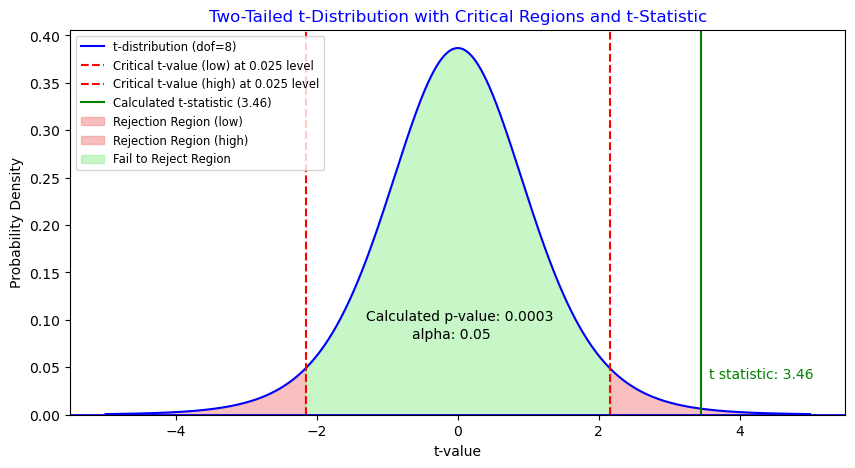

In [52]:
# Given values from your t-test
t_critical_low = -2.160  # Example critical t-value from calculations
t_critical_high = 2.160   # Example critical t-value from calculations
t_calculated = 3.456  # Replace with your calculated t-statistic
p_value = 0.0002953  # Given p-value from the t-test
dof = 8  # Replace with your calculated degrees of freedom (n - 1)
alpha = 0.05

# Define the range for the t-distribution plot
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (dof={dof})', color='blue')

# Mark the critical t-values for alpha (two-tailed test)
plt.axvline(t_critical_low, color='red', linestyle='--', label=f'Critical t-value (low) at {alpha/2} level')
plt.axvline(t_critical_high, color='red', linestyle='--', label=f'Critical t-value (high) at {alpha/2} level')

# Mark the calculated t-statistic
plt.axvline(t_calculated, color='green', linestyle='-', label=f'Calculated t-statistic ({t_calculated:.2f})')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the rejection regions
plt.fill_between(x, 0, y, where=(x <= t_critical_low), color='lightcoral', alpha=0.5, label='Rejection Region (low)')
plt.fill_between(x, 0, y, where=(x >= t_critical_high), color='lightcoral', alpha=0.5, label='Rejection Region (high)')

# Fill the fail to reject area with light green
plt.fill_between(x, 0, y, where=(x > t_critical_low) & (x < t_critical_high), color='lightgreen', alpha=0.5, label='Fail to Reject Region')

# Add text for p-value and alpha
plt.text(-1.3, 0.1, f'Calculated p-value: {p_value:.4f}', fontsize=10)
plt.text(-0.65, 0.08, f'alpha: {alpha}', fontsize=10)
plt.text(t_calculated + 0.85, 0.05, f't statistic: {t_calculated:.2f}', color='green', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('Two-Tailed t-Distribution with Critical Regions and t-Statistic', color='blue')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Example-02 (Paired (Dependent) Samples t-Test):</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:red;">Prozac Data:</span>
</p>


- Let us consider a simple example of what is often termed "pre/post" data or "pretest/posttest" data.
- Suppose you wish to test the effect of Prozac on the well-being of depressed individuals, using a standardised "well-being scale" that sums Likert-type items to obtain a score that could range from 0 to 20.
- Higher scores indicate greater well-being (that is, Prozac is having a positive effect).
While there are flaws in this design (e.g., lack of a control group) it will serve as an example of how to analyse such data.
- Determine if Prozac enhances well-being in depressed individuals. Use 0.05

In [53]:
# Reading Prozac dataset

prozac = pd.read_csv("prozac.csv")
prozac

,moodpre,moodpost,difference
0,3,5,2
1,0,1,1
2,6,5,-1
3,7,7,0
4,4,10,6
5,3,9,6
6,2,7,5
7,1,11,10
8,4,8,4


In [54]:
prozac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   moodpre     9 non-null      int64
 1   moodpost    9 non-null      int64
 2   difference  9 non-null      int64
dtypes: int64(3)
memory usage: 348.0 bytes


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

In [55]:
# Average of moodpost

prozac["moodpre"].mean()

3.3333333333333335

In [56]:
# Average of moodpost

prozac["moodpost"].mean()

7.0

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02: Calculating Test Statistic & p-value (the t-test for the means of two dependent (Paired) samples of scores):</strong></p>

**Conduct Paired (Dependent) Samples t-Test:**

In [57]:
pairedtest = stats.ttest_rel(prozac.moodpost, prozac.moodpre, alternative="greater")
pairedtest

TtestResult(statistic=3.1428571428571423, pvalue=0.006872912197394244, df=8)

**Test Statistic:**

In [58]:
test_statistic = pairedtest.statistic
test_statistic

3.1428571428571423

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-03: Calculating the p-value:</strong></p>

**P Value:**

In [59]:
p_value = pairedtest.pvalue
p_value 

0.006872912197394244

**``Interpretation of the Test Statistic:``**

- **``Test Statistic``**: The t-statistic of approximately 3.14 indicates the ratio of the difference between the group means to the variation in the sample data.
  - A higher t-statistic suggests a greater difference between the means relative to the variability of the data. In this case, it indicates that the average increase in well-being scores after taking Prozac is substantial compared to the variability in scores.
- The p-value (0.0069) is significantly less than the alpha level of 0.05, leading us to reject the null hypothesis.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [60]:
alpha = 0.05

if pairedtest.pvalue < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we FAIL to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


**``Conclusion:``**
- **``Rejecting the Null Hypothesis``**: At the 0.05 level of significance, we reject the null hypothesis, indicating that there is a statistically significant difference in well-being scores before and after treatment with Prozac.

**``Interpretation of the Decision:``**
- The results suggest that the well-being scores (measured on a scale from 0 to 20) significantly increased after the individuals were treated with Prozac. The t-statistic of approximately 3.14 and the p-value of 0.0069 indicate that the observed improvement in well-being is unlikely to have occurred by chance.
- This finding supports the idea that Prozac has a positive effect on enhancing the well-being of depressed individuals, as reflected by the increase in scores on the well-being scale.

**``Wrap Up:``**
- This analysis provides evidence that Prozac may effectively enhance the well-being of individuals suffering from depression. While the study design has limitations, such as the absence of a control group, the significant results warrant further investigation. Future studies could explore the long-term effects of Prozac and consider including a control group to strengthen the findings.

**Making a decision comparing ``calculated`` and ``critical`` t scores:**

In [61]:
# Calculate differences
differences = prozac['moodpost'] - prozac['moodpre']

# Calculate mean and standard deviation of differences
mean_diff = np.mean(differences)
std_dev_diff = np.std(differences, ddof=1)  # Sample standard deviation
n = len(differences)                         # Sample size

# Calculate the t-statistic for paired samples
t_calculated = mean_diff / (std_dev_diff / np.sqrt(n))

# Degrees of freedom
dof = n - 1

# Significance level
alpha = 0.05

# Critical t-value for the one-tailed test
t_critical = stats.t.ppf(1 - alpha, dof)  # Upper critical value for one-tailed test

# Calculate the p-value for the one-tailed test
p_value = 1 - stats.t.cdf(t_calculated, dof)  # One-tailed p-value

# Print the results
print(f'Critical t-value: {t_critical:.4f}')
print(f'Calculated t-value: {t_calculated:.4f}')
print(f'Degrees of Freedom (dof): {dof}')
print(f'Alpha (significance level): {alpha}')
print(f'Calculated p-value: {p_value:.10f}')

# Decision
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Critical t-value: 1.8595
Calculated t-value: 3.1429
Degrees of Freedom (dof): 8
Alpha (significance level): 0.05
Calculated p-value: 0.0068729122
Reject the null hypothesis.


- **``The critical t-values are:``**

  - **``Lower Critical t-value``**: N/A (not applicable for one-tailed test)
  - **``Upper Critical t-value``**: tcritical

- These critical t-values represent the threshold for rejecting the null hypothesis at the 0.05 significance level for a one-tailed test with (n−1) degrees of freedom. Values falling above this threshold indicate significant positive differences in well-being scores after treatment with Prozac.

- **``Decision Rule:``**
  - The calculated t-statistic is compared against the critical t-value.
    - For a one-tailed test, we reject the null hypothesis if the calculated t-statistic is greater than the upper critical t-value.

- **``Rejection Region:``** ``t > t critical``
 
  - Since the calculated t-statistic of (t_calculated) is greater than the upper critical t-value of (t_critical), we reject the null hypothesis.

    - This indicates that there is enough evidence to suggest that Prozac enhances well-being in depressed individuals at the 0.05 significance level.

- **``Conclusion:``**
  - In conclusion, the results suggest that the average well-being scores of individuals after treatment with Prozac are significantly higher than before treatment. This finding may have important implications for the use of Prozac in clinical settings for improving mental health in depressed individuals.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Visualizing the results:</strong></p>

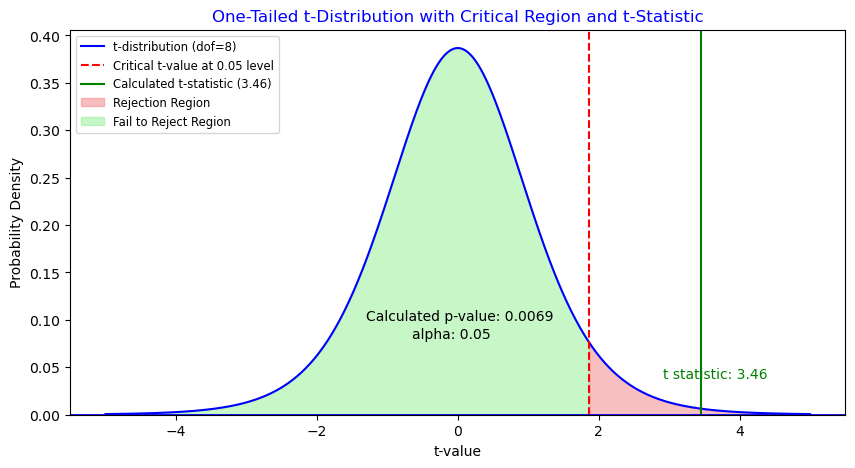

In [62]:
# Given values from your t-test
t_critical = stats.t.ppf(1 - 0.05, 8)  # Calculate the critical t-value for one-tailed test
t_calculated = 3.456  # Replace with your calculated t-statistic
p_value = 0.0069  # Given p-value from the t-test
dof = 8  # Degrees of freedom (n - 1)
alpha = 0.05

# Define the range for the t-distribution plot
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (dof={dof})', color='blue')

# Mark the critical t-value for alpha (one-tailed test)
plt.axvline(t_critical, color='red', linestyle='--', label=f'Critical t-value at {alpha} level')

# Mark the calculated t-statistic
plt.axvline(t_calculated, color='green', linestyle='-', label=f'Calculated t-statistic ({t_calculated:.2f})')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the rejection region
plt.fill_between(x, 0, y, where=(x >= t_critical), color='lightcoral', alpha=0.5, label='Rejection Region')

# Fill the fail to reject area with light green
plt.fill_between(x, 0, y, where=(x < t_critical), color='lightgreen', alpha=0.5, label='Fail to Reject Region')

# Add text for p-value and alpha
plt.text(-1.3, 0.1, f'Calculated p-value: {p_value:.4f}', fontsize=10)
plt.text(-0.65, 0.08, f'alpha: {alpha}', fontsize=10)
plt.text(t_calculated + 0.2, 0.05, f't statistic: {t_calculated:.2f}', color='green', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('One-Tailed t-Distribution with Critical Region and t-Statistic', color='blue')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">It's your turn (Paired (Dependent) Samples t-Test Exercise for Students):</p>

The data set is fictitious and contains blood pressure readings before and after an intervention (treatment). These are variables ``“bp_before”`` and ``“bp_after”``.

In [63]:
df = pd.read_csv("blood_pressure.csv")
df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


**``The dataset contains the following columns:``**

- **``patient``**: Unique identifier for each participant
- **``sex``**: Gender of the participant (Male/Female)
- **``agegrp``**: Age group of the participant (e.g., 30-45, 60+)
- **``bp_before``**: Blood pressure reading before treatment
- **``bp_after``**: Blood pressure reading after treatment

In [64]:
df[['bp_before', 'bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02: Calculating Test Statistic & p-value (the t-test for the means of two dependent (Paired) samples of scores):</strong></p>

**Conduct Independent Samples t-Test:**

In [66]:
pairedtest = stats.ttest_rel(df['bp_before'], df['bp_after'])
pairedtest

TtestResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823, df=119)

**Test Statistic:**

In [67]:
test_statistic = pairedtest.statistic
test_statistic

3.3371870510833657

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-03: Calculating the p-value:</strong></p>

**P Value:**

In [68]:
p_value = pairedtest.pvalue
p_value 

0.0011297914644840823

**``T-Test Interpretation:``**
- The t-statistic of 3.3372 indicates a significant difference between the two measurements.
- The p-value (0.0011) is much lower than the significance level of 0.05, leading us to reject the null hypothesis

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [69]:
alpha = 0.05

if pairedtest.pvalue < alpha:
    print('At {} level of significance, we can reject the Null hypothesis (H0) in favor of Alternative hypothesis (H1).'.format(alpha))
else:
    print('At {} level of significance, we FAIL to reject the Null hypothesis (H0).'.format(alpha))

At 0.05 level of significance, we can reject the Null hypothesis (H0) in favor of Alternative hypothesis (H1).


**Interpretation of the results:**

**``Conclusion:``**
- The findings are ``statistically significant!`` One can ``reject the null hypothesis`` in support of the alternative.

  - **``Rejecting the Null Hypothesis``**: At the 0.05 level of significance, we reject the null hypothesis, indicating that there is a statistically significant difference in blood pressure readings before and after treatment.

**``Interpretation of the Decision:``**
- The results suggest that the treatment effectively alters blood pressure levels among participants. Specifically, the decrease in blood pressure from the "bp_before" to "bp_after" indicates a positive treatment outcome.
- This finding could support the use of this treatment in clinical practice for managing high blood pressure.

**``Wrap up:``**
This analysis highlights the effectiveness of the new treatment in reducing blood pressure, providing crucial evidence for its potential application in medical settings. The results underscore the importance of continued research in hypertension management and the benefits of effective treatments for patient health.

In this analysis, another component needed to report the findings is the ``degrees of freedom (df)``. This can be calculated by taking the total number of paired observations and subtracting 1. In our case, ``df = 120 – 1 = 119``.

A paired sample t-test was used to analyze the blood pressure before and after the intervention to test if the intervention had a significant affect on the blood pressure. The blood pressure before the intervention was higher (156.45 ± 11.39 units) compared to the blood pressure post intervention (151.36 ± 14.18 units); there was a statistically significant decrease in blood pressure (t(119)=3.34, p= 0.0011) of 5.09 units.

**Making a decision comparing ``calculated`` and ``critical`` t scores:**

- **``NOTE:``** To ensure the calculated t-value is positive, it's important to clarify the direction of the difference you want to analyze. If you want a positive t-value, you should calculate the differences as ``"bp_before"`` - ``"bp_after"``, assuming you want to test if the "before" values are greater than the "after" values. Here’s the updated code reflecting that approach:

In [70]:
# Calculate differences (to ensure positive t-value)
differences = df['bp_before'] - df['bp_after']  # Change this to ensure a positive difference

# Calculate mean and standard deviation of differences
mean_diff = np.mean(differences)
std_dev_diff = np.std(differences, ddof=1)  # Sample standard deviation
n = len(differences)                         # Sample size

# Calculate the t-statistic for paired samples
t_calculated = mean_diff / (std_dev_diff / np.sqrt(n))

# Degrees of freedom
dof = n - 1

# Significance level
alpha = 0.05

# Critical t-values for the two-tailed test
t_critical_low = stats.t.ppf(alpha / 2, dof)   # Lower critical value
t_critical_high = stats.t.ppf(1 - alpha / 2, dof)  # Upper critical value

# Calculate the p-value for the two-tailed test
p_value = 2 * (1 - stats.t.cdf(t_calculated, dof))  # Two-tailed p-value

# Print the results
print(f'Critical t-value (low): {t_critical_low:.4f}')
print(f'Critical t-value (high): {t_critical_high:.4f}')
print(f'Calculated t-value: {t_calculated:.4f}')
print(f'Degrees of Freedom (dof): {dof}')
print(f'Alpha (significance level): {alpha}')
print(f'Calculated p-value: {p_value:.10f}')

# Decision
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Critical t-value (low): -1.9801
Critical t-value (high): 1.9801
Calculated t-value: 3.3372
Degrees of Freedom (dof): 119
Alpha (significance level): 0.05
Calculated p-value: 0.0011297915
Reject the null hypothesis.


- **``The critical t-values are:``**

  - **``Lower Critical t-value``**: tcritical low
  - **``Upper Critical t-value``**: tcritical high

    - These critical t-values represent the thresholds for rejecting the null hypothesis at the 0.05 significance level for a two-tailed test with (n−1) degrees of freedom. Values falling outside this range indicate significant differences between the blood pressure readings before and after treatment.

- **``Decision Rule:``**
  - The calculated t-statistic is compared against the critical t-values. For a two-tailed test, we reject the null hypothesis if the calculated t-statistic is less than the lower critical t-value or greater than the upper critical t-value.

- **``Rejection Region``**: ``t < t critical low``  or ``t > t critical high``
 
  - Since the calculated t-statistic of (t_calculated) is greater than the upper critical t-value of (t critical high), we reject the null hypothesis.

  - This indicates that there is enough evidence to suggest that there is a significant difference in blood pressure readings before and after treatment at the 0.05 significance level.

- **``Conclusion:``**
  - In conclusion, the results suggest that the average blood pressure readings before treatment are significantly higher than those after treatment. This finding may have important implications for the effectiveness of the intervention in managing blood pressure levels among patients.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Visualizing the results:</strong></p>

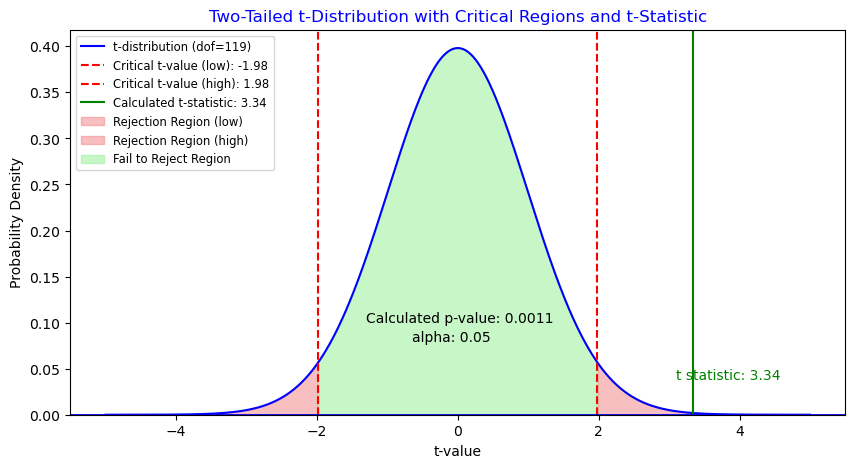

In [71]:
# Calculate differences (to ensure positive t-value)
differences = df['bp_before'] - df['bp_after']  # Change to ensure a positive difference

# Calculate mean and standard deviation of differences
mean_diff = np.mean(differences)
std_dev_diff = np.std(differences, ddof=1)  # Sample standard deviation
n = len(differences)                         # Sample size

# Calculate the t-statistic for paired samples
t_calculated = mean_diff / (std_dev_diff / np.sqrt(n))

# Degrees of freedom
dof = n - 1

# Significance level
alpha = 0.05

# Critical t-values for the two-tailed test
t_critical_low = stats.t.ppf(alpha / 2, dof)   # Lower critical value
t_critical_high = stats.t.ppf(1 - alpha / 2, dof)  # Upper critical value

# Define the range for the t-distribution plot
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (dof={dof})', color='blue')

# Mark the critical t-values for alpha (two-tailed test)
plt.axvline(t_critical_low, color='red', linestyle='--', label=f'Critical t-value (low): {t_critical_low:.2f}')
plt.axvline(t_critical_high, color='red', linestyle='--', label=f'Critical t-value (high): {t_critical_high:.2f}')

# Mark the calculated t-statistic
plt.axvline(t_calculated, color='green', linestyle='-', label=f'Calculated t-statistic: {t_calculated:.2f}')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the rejection regions
plt.fill_between(x, 0, y, where=(x <= t_critical_low), color='lightcoral', alpha=0.5, label='Rejection Region (low)')
plt.fill_between(x, 0, y, where=(x >= t_critical_high), color='lightcoral', alpha=0.5, label='Rejection Region (high)')

# Fill the fail to reject area with light green
plt.fill_between(x, 0, y, where=(x > t_critical_low) & (x < t_critical_high), color='lightgreen', alpha=0.5, label='Fail to Reject Region')

# Add text for p-value and alpha
p_value = 2 * (1 - stats.t.cdf(t_calculated, dof))  # Calculate the two-tailed p-value
plt.text(-1.3, 0.1, f'Calculated p-value: {p_value:.4f}', fontsize=10)
plt.text(-0.65, 0.08, f'alpha: {alpha}', fontsize=10)
plt.text(t_calculated + 0.5, 0.05, f't statistic: {t_calculated:.2f}', color='green', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('Two-Tailed t-Distribution with Critical Regions and t-Statistic', color='blue')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FFFFFF; font-size:175%; text-align:center; border-radius:10px 10px;">C - ANOVA (Analysis of Variance)</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>💡🚨📢👉 Compares the means of ``two or more`` ``independent groups`` ❗❗❗</strong></p>

## [ANOVA](https://libguides.library.kent.edu/SPSS/OneWayANOVA)

One-Way ANOVA ("analysis of variance") compares the means of two or more independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. One-Way ANOVA is a parametric test.

This test is also known as:

- One-Factor ANOVA
- One-Way Analysis of Variance
- Between Subjects ANOVA

**The null and alternative hypotheses of one-way ANOVA can be expressed as:**

- H0: µ1 = µ2 = µ3  = ...   = µk   ("all k population means are equal")
- H1: At least one µi different  ("at least one of the k population means is not equal to the others")

where

µi is the population mean of the ith group (i = 1, 2, ..., k)

``Note:`` The One-Way ANOVA is considered an omnibus (Latin for “all”) test because the F test indicates whether the model is significant overall—i.e., whether or not there are any significant differences in the means between any of the groups. (Stated another way, this says that at least one of the means is different from the others.) However, it does not indicate which mean is different. Determining which specific pairs of means are significantly different requires either contrasts or post hoc (Latin for “after this”) tests. Besides the one-way ANOVA is considered a robust test against the normality assumption. This means that it tolerates violations to its normality assumption rather well.

**Assumptions:**

- The dependent variable is continuous, and it is measured twice on the same sample of subjects.
- The independent variable should consist of two categorical, "related groups" or "matched pairs".
- The difference between the scores of the variables are normally distributed.

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Example-01 (ANOVA - Analysis of variance):</p>

In [72]:
# pip install statsmodels

In [73]:
import statsmodels.api as sm

In [74]:
df = sm.datasets.get_rdataset(dataname="Cushings", package="MASS")

df.keys()

dict_keys(['data', '__doc__', 'package', 'title', 'from_cache'])

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:red;">Cushing syndrome:</span> <span style="color:green;">happens when the body has too much of the hormone cortisol for a long time. This can result from the body making too much cortisol, or from taking medicines called glucocorticoids, which affect the body the same way as cortisol.</span>
</p>

In [75]:
df = df.data

df.head(10)

,Tetrahydrocortisone,Pregnanetriol,Type
rownames,,,
a1,3.1,11.70,a
a2,3.0,1.30,a
a3,1.9,0.10,a
a4,3.8,0.04,a
a5,4.1,1.10,a
a6,1.9,0.40,a
b1,8.3,1.00,b
b2,3.8,0.20,b
b3,3.9,0.60,b


**The dataset consists of the following columns:**
- **``Tetrahydrocortisone``**: Level of Tetrahydrocortisone hormone (in unspecified units)
- **``Pregnanetriol``**: Level of Pregnanetriol hormone (in unspecified units)
- **``Type``**: Classification of the patient (either "a" or "b")

In [76]:
df.shape

(27, 3)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, a1 to u6
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tetrahydrocortisone  27 non-null     float64
 1   Pregnanetriol        27 non-null     float64
 2   Type                 27 non-null     object 
dtypes: float64(2), object(1)
memory usage: 864.0+ bytes


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:red;">Hypothetical Scenario:</span> <span style="color:green;"> Investigating Hormonal Profiles in Cushing Syndrome Patients.</span>
</p>

- **``Context``**: A team of endocrinologists is conducting a study to better understand the hormonal profiles associated with Cushing syndrome. This condition is characterized by prolonged exposure to elevated cortisol levels, which can lead to various health complications.

  - The study aims to compare the levels of two specific metabolites—T``etrahydrocortisone`` and ``Pregnanetriol``—among patients diagnosed with Cushing syndrome. By analyzing these metabolites, researchers hope to identify patterns that could aid in the diagnosis and management of the condition.

- **``Study Design``**:
  - **``Objective``**: To assess the differences in Tetrahydrocortisone and Pregnanetriol levels between two groups of patients with Cushing syndrome.
- **``Groups``**:
  - **``Group A``**: Patients with endogenous Cushing syndrome (where the body produces excess cortisol).
  - **``Group B``**: Patients receiving glucocorticoid therapy (exogenous sources of cortisol).

**[Checking the Assumptions for One-Way ANOVA Test:](https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1)**

There are **``three primary assumptions in ANOVA``**:

- The responses for each factor level have a ``normal population distribution``.
- These distributions have the ``same variance`` (Homogenity of variances).
- The data are ``independent``.

Besides;
- The ``dependent variable`` is ``continuous``.
- The ``independent variable`` that is ``categorical``.

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:110%; text-align:left;"><strong>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</strong></p>

**Conduct Homogenity of Variance Test:**

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Before conducting a one-way ANOVA, it is essential to check the assumption of homogeneity of variances among the groups. This ensures that the variances across the different groups are approximately equal, which is a key assumption for ANOVA.</span>
</p>

**``Levene's Test``**: One common method to test for homogeneity of variances is Levene's test. This test assesses whether the variance among the groups is the same.

In [78]:
# Grouping the data by Type for ANOVA
group_a = df.Tetrahydrocortisone[df.Type == "a"]
group_b = df.Tetrahydrocortisone[df.Type == "b"]
group_c = df.Tetrahydrocortisone[df.Type == "c"]
group_u = df.Tetrahydrocortisone[df.Type == "u"]

# Conducting Levene's Test for Homogeneity of Variances
stat, p_value_levene = stats.levene(group_a, group_b, group_c, group_u)

print("Levene's Test for Homogeneity of Variances:")
print(f"Statistic: {stat}, p-value: {p_value_levene}")

# Check if the p-value is greater than 0.05
if p_value_levene > 0.05:
    print("Homogeneity of variances assumption is NOT violated. Proceeding with ANOVA.")
    
    # Conducting the one-way ANOVA
    f_stat, p_value_anova = stats.f_oneway(group_a, group_b, group_c, group_u)
    
    # Output the ANOVA results
    print("One-way ANOVA results for Tetrahydrocortisone:")
    print(f"F-statistic: {f_stat}, p-value: {p_value_anova}")
else:
    print("Homogeneity of variances assumption is violated. Consider using a different method (e.g., Welch's ANOVA).")

Levene's Test for Homogeneity of Variances:
Statistic: 1.4638116353797523, p-value: 0.25050472991960193
Homogeneity of variances assumption is NOT violated. Proceeding with ANOVA.
One-way ANOVA results for Tetrahydrocortisone:
F-statistic: 3.2257394791378426, p-value: 0.0412182793672776


**Levene's Test Results:**
- Based on the results of the homogeneity test (Levene’s test), we observed whether the variances across the groups (control, patient1, patient2) are equal. If the assumption of homogeneity of variances is met, we proceed with the one-way ANOVA.
  - **``Levene's p-value > 0.05``**: This suggests that the variances across the groups are equal (homogeneous), and we can proceed with the one-way ANOVA.
  - **``Levene's p-value ≤ 0.05``**: If the p-value is less than or equal to 0.05, this indicates a violation of the homogeneity assumption, suggesting that we might want to use Welch's ANOVA instead of the standard one-way ANOVA.


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:110%; text-align:left;"><strong>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</strong></p>


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

In [79]:
from scipy.stats import f_oneway

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02: Calculating Test Statistic:</strong></p>

In [80]:
df.Type.unique()

array(['a', 'b', 'c', 'u'], dtype=object)

In [81]:
df[df.Type=="a"]

,Tetrahydrocortisone,Pregnanetriol,Type
rownames,,,
a1,3.1,11.70,a
a2,3.0,1.30,a
a3,1.9,0.10,a
a4,3.8,0.04,a
a5,4.1,1.10,a
a6,1.9,0.40,a


In [82]:
df.Tetrahydrocortisone[df.Type=="a"]

rownames
a1    3.1
a2    3.0
a3    1.9
a4    3.8
a5    4.1
a6    1.9
Name: Tetrahydrocortisone, dtype: float64

**Conduct ANOVA (Analysis of Variance):**

In [83]:
anova_test = f_oneway((df.Tetrahydrocortisone[df.Type=="a"]), 
                      (df.Tetrahydrocortisone[df.Type=="b"]),
                      (df.Tetrahydrocortisone[df.Type=="c"]),
                      (df.Tetrahydrocortisone[df.Type=="u"]))

anova_test

F_onewayResult(statistic=3.2257394791378426, pvalue=0.0412182793672776)

**Interpretation of Results**
- **``F-statistic``**: This value indicates the ratio of variance between the groups to the variance within the groups. A **``higher F-value``** suggests a **``greater variance between the group means``** compared to the variance within the groups.
- **``p-value``**: This value indicates the probability of observing the data if the null hypothesis is true (i.e., there is NO difference between the group means). 

**Decision Rule:**
- If the **``p-value``** is **``less than the significance level``** (commonly set at 0.05), we **``reject the null hypothesis``**, concluding that there is a **``statistically significant difference between the groups``**.

**Conclusion**
- Based on the results of the ANOVA, we can determine if there are significant differences in the levels of Tetrahydrocortisone and Pregnanetriol between the two groups of patients with Cushing syndrome. If significant differences are found, further post-hoc analyses (like Tukey's HSD) can be performed to explore the differences in more detail.

**Test Statistic:**

In [84]:
test_statistic = anova_test.statistic
test_statistic

3.2257394791378426

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-03: Calculating the p-value:</strong></p>

**P Value:**

In [85]:
p_value = anova_test.pvalue
p_value

0.0412182793672776

- The **``F-statistic``** of **``3.23``** indicates a substantial variance between the group means compared to the variance within the groups.
- The **``p-value (0.0412)``** is significantly lower than the alpha level of 0.05.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [86]:
alpha = 0.05

if anova_test.pvalue < alpha:
    print('At {} level of significance, we can reject the Null hypothesis (H0) in favor of Alternative hypothesis (H1) \nand conclude that the differences among group means (at least one group) are statistically significant.'.format(alpha))
else:
    print('At {} level of significance, we FAIL to reject the Null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the Null hypothesis (H0) in favor of Alternative hypothesis (H1) 
and conclude that the differences among group means (at least one group) are statistically significant.


**``Conclusion:``**
**``Rejecting the Null Hypothesis``**: At the 0.05 level of significance, we reject the null hypothesis, indicating that there is a statistically significant difference in hormone levels among at least one of the groups.

**``Interpretation of the Decision:``**
- The results suggest that the levels of Tetrahydrocortisone and/or Pregnanetriol differ significantly between at least one of the patient types (a or b).
- This finding could have implications for understanding the hormonal profiles of patients with Cushing's syndrome and could guide treatment strategies or further research.

**``Wrap up``**
This analysis highlights that there are significant differences in hormone levels between the patient types in Cushing's syndrome, providing valuable insights into the condition and its physiological impacts. Further research may be warranted to explore the underlying factors contributing to these differences and to assess their clinical relevance.

**Making a decision comparing the ``calculated F-statistic`` to a ``critical F-value``:**

In [87]:
# Extract F-statistic and p-value
f_calculated = anova_test.statistic
p_value = anova_test.pvalue

# Degrees of freedom
k = len(df['Type'].unique())  # Number of groups
n = df.shape[0]               # Total number of observations
dof_numerator = k - 1         # Degrees of freedom between groups
dof_denominator = n - k       # Degrees of freedom within groups

# Significance level
alpha = 0.05

# Critical F-value
f_critical = stats.f.ppf(1 - alpha, dof_numerator, dof_denominator)

# Print the results
print(f'Calculated F-statistic: {f_calculated:.4f}')
print(f'Critical F-value: {f_critical:.4f}')
print(f'Calculated p-value: {p_value:.10f}')

# Decision
if f_calculated > f_critical:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Calculated F-statistic: 3.2257
Critical F-value: 3.0280
Calculated p-value: 0.0412182794
Reject the null hypothesis.


- **``The critical F-values are:``**
  - **``Critical F-value``**: Fcritical
  - **``Calculated F-statistic``**: fcalculated

    - This critical F-value represents the threshold for rejecting the null hypothesis at the 0.05 significance level, based on the degrees of freedom for the numerator and denominator. Values falling outside this range indicate significant differences in hormone levels among the different types of patients.

- **``Decision Rule:``**
  - The calculated F-statistic is compared against the critical F-value. For ANOVA, we reject the null hypothesis if the calculated F-statistic is greater than the critical F-value.

- **``Rejection Region``**: ``F > Fcritical``

  - Since the calculated F-statistic of 3.2257 (f_calculated) is greater than the critical F-value of 3.0280 (F_critical), we reject the null hypothesis.

  - This indicates that there is enough evidence to suggest that at least one group mean is significantly different from the others at the 0.05 significance level.

- **``Conclusion:``**
  - In conclusion, the results suggest that there are significant differences in the levels of Tetrahydrocortisone among the different types of patients with Cushing's syndrome. This finding may have important implications for understanding the variations in hormone levels and the effectiveness of different treatment approaches.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Visualizing the results:</strong></p>

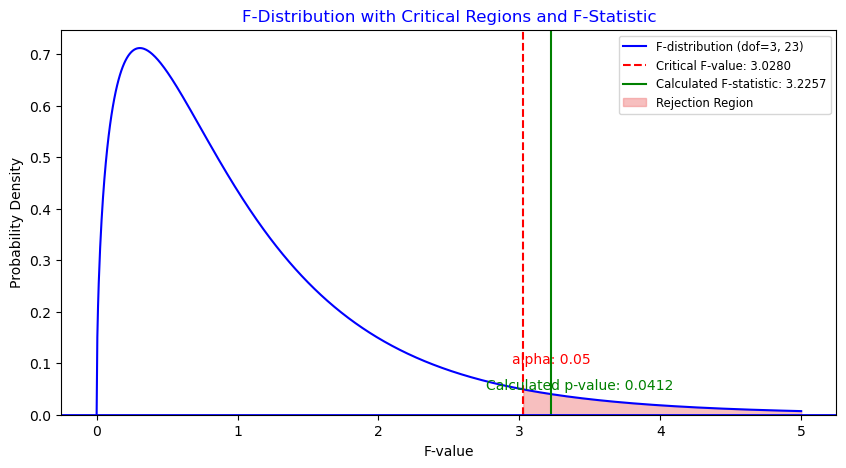

In [88]:
# Extract F-statistic and p-value
f_calculated = anova_test.statistic
p_value = anova_test.pvalue

# Degrees of freedom
k = len(df['Type'].unique())  # Number of groups
n = df.shape[0]               # Total number of observations
dof_numerator = k - 1         # Degrees of freedom between groups
dof_denominator = n - k       # Degrees of freedom within groups

# Significance level
alpha = 0.05

# Critical F-value
f_critical = stats.f.ppf(1 - alpha, dof_numerator, dof_denominator)

# Define the range for the F-distribution plot
x = np.linspace(0, 5, 1000)
y = stats.f.pdf(x, dof_numerator, dof_denominator)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the F-distribution
plt.plot(x, y, label=f'F-distribution (dof={dof_numerator}, {dof_denominator})', color='blue')

# Mark the critical F-value
plt.axvline(f_critical, color='red', linestyle='--', label=f'Critical F-value: {f_critical:.4f}')

# Mark the calculated F-statistic
plt.axvline(f_calculated, color='green', linestyle='-', label=f'Calculated F-statistic: {f_calculated:.4f}')

# Fill the rejection region
plt.fill_between(x, 0, y, where=(x >= f_critical), color='lightcoral', alpha=0.5, label='Rejection Region')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Add text for p-value and alpha
plt.text(f_calculated + 0.2, 0.05, f'Calculated p-value: {p_value:.4f}', color='green', fontsize=10, ha='center')
plt.text(f_critical + 0.2, 0.1, f'alpha: {alpha}', fontsize=10, color='red', ha='center')

# Add titles and labels
plt.title('F-Distribution with Critical Regions and F-Statistic', color='blue')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#FF0000; font-size:125%; text-align:left;">🚨📢🔔⚠️ IMPORTANT: In theory, a negative calculated F-statistic is NOT possible. The F-statistic is a ratio of variances, specifically the variance between groups divided by the variance within groups. Since variances are always non-negative values (as they are derived from squared quantities), the F-statistic itself will always be non-negative.</p>

- **``Interpretation:``**
  - An F-statistic of 0 would indicate that the variance between the groups is zero, suggesting that the group means are equal.
  - A positive F-statistic indicates that there is more variance between the group means than within the groups, which is what we want to detect in an ANOVA.

- **``If a negative value is observed:``**
  - If we somehow calculate a negative F-statistic, it typically indicates a computational error or misuse of the formulas involved in the ANOVA process.

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">It's your turn (ANOVA Exercise Exercise for Students):</p>


## [Dataset Source](https://nicoleeic.github.io/Brain_and_Code/2019/09/02/ANOVA_new.html)

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:red;">Hypothetical Scenario:</span> <span style="color:green;">Evaluating Treatment Effects on Recovery Time.</span>
</p>

Context: A clinical research team is investigating the effects of two different treatments on recovery time for patients after knee surgery. The team conducts an experiment to assess the recovery times observed under a standard rehabilitation program versus a new, innovative therapy.

- In this experiment, researchers randomly assign thirty patients to one of two treatment groups: the control group, which follows the standard rehabilitation program, and the experimental group, which receives the new therapy. The recovery times, measured in days, are recorded for each patient.

- The goal of the study is to determine if there is a statistically significant difference in recovery times between the two treatment methods, which could inform future clinical practices.

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:110%; text-align:left;"><strong>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</strong></p>


**The following code snippet generates a DataFrame (df_1way) for an experimental design with three groups (control, patient1, patient2) and thirty subjects per group.**

In [89]:
# information on experimental design
group_list = ['control','patient1','patient2']
subs_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

# read data into dataframe
df_1way = pd.DataFrame(columns=["group", "value"])

my_row = 0
for ind_g, group in enumerate(group_list):
    for sub in subs_list:
        # generate random value here as example
        my_val = np.random.normal(ind_g, 1, 1)[0]
        df_1way.loc[my_row] = [group, my_val]
        my_row = my_row + 1

In [90]:
df_1way

,group,value
0,control,1.330309
1,control,-0.734269
2,control,0.203671
3,control,-0.186697
4,control,1.167343
5,control,0.675459
6,control,1.424499
7,control,-1.029691
8,control,0.795588
9,control,0.344925


In [91]:
df_1way.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   30 non-null     object 
 1   value   30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:110%; text-align:left;"><strong>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</strong></p>

**Conduct Homogenity of Variance Test:**


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Before conducting a one-way ANOVA, it is essential to check the assumption of homogeneity of variances among the groups. This ensures that the variances across the different groups are approximately equal, which is a key assumption for ANOVA.</span>
</p>

**``Levene's Test``**: One common method to test for homogeneity of variances is Levene's test. This test assesses whether the variance among the groups is the same.

In [92]:
# Conducting Levene's Test for Homogeneity of Variances
group_control = df_1way.value[df_1way.group == "control"]
group_patient1 = df_1way.value[df_1way.group == "patient1"]
group_patient2 = df_1way.value[df_1way.group == "patient2"]

# Perform Levene's test
stat, p_value = stats.levene(group_control, group_patient1, group_patient2)

# Output the results
print("Levene's Test for Homogeneity of Variances:")
print(f"Statistic: {stat}, p-value: {p_value}")

# Check if the p-value is greater than 0.05
if p_value > 0.05:
    print("Homogeneity of variances assumption is NOT violated (p > 0.05).")
else:
    print("Homogeneity of variances assumption is violated (p ≤ 0.05). Consider using Welch's ANOVA.")

Levene's Test for Homogeneity of Variances:
Statistic: 1.6981632777577582, p-value: 0.20198817466085128
Homogeneity of variances assumption is NOT violated (p > 0.05).


**Levene's Test Results:**
- Based on the results of the homogeneity test (Levene’s test), we observed whether the variances across the groups (control, patient1, patient2) are equal. If the assumption of homogeneity of variances is met, we proceed with the one-way ANOVA.
  - **``Levene's p-value > 0.05``**: This suggests that the variances across the groups are equal (homogeneous).
  - **``Levene's p-value ≤ 0.05``**: This indicates a violation of the homogeneity assumption, suggesting that we might want to use Welch's ANOVA instead of the standard one-way ANOVA.


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:110%; text-align:left;"><strong>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</strong></p>


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:red;">Research Question:</span> <span style="color:green;">Compare an outcome measure in three different groups of subjects (healthy controls and two groups of patients, 10 subjects per group).</span>
</p>


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02: Calculating Test Statistic:</strong></p>

In [93]:
# Filter the DataFrame

df_1way[df_1way.group=="control"]

,group,value
0,control,1.330309
1,control,-0.734269
2,control,0.203671
3,control,-0.186697
4,control,1.167343
5,control,0.675459
6,control,1.424499
7,control,-1.029691
8,control,0.795588
9,control,0.344925


**Conduct ANOVA (Analysis of Variance):**

In [94]:
anova_test = f_oneway((df_1way.value[df_1way.group=="control"]), 
                      (df_1way.value[df_1way.group=="patient1"]),
                      (df_1way.value[df_1way.group=="patient2"]))


anova_test

F_onewayResult(statistic=10.192280036930583, pvalue=0.0005038639671731915)

**Interpretation of Results for Patient Groups**
- **``F-statistic``**: This value indicates the ratio of variance between the groups to the variance within the groups. A **``higher F-value``** suggests a **``greater variance between the group means``** compared to the variance within the groups.

- **``p-value``**: This value indicates the probability of observing the data if the null hypothesis is true (i.e., there is NO difference between the group means). A lower p-value suggests that the observed differences in means are unlikely to have occurred by chance.



**Test Statistic:**

In [95]:
test_statistic = anova_test.statistic
test_statistic

10.192280036930583

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-03: Calculating the p-value:</strong></p>

**P Value:**

In [96]:
p_value = anova_test.pvalue
p_value

0.0005038639671731915

**Decision Rule:**
- If the **``p-value``** is **``less than the significance level``** (commonly set at 0.05), we **``reject the null hypothesis``**, concluding that there is a **``statistically significant difference between the groups``**.

**Conclusion**

- If the results of the one-way ANOVA indicate a significant p-value (less than 0.05), it suggests that there are significant differences in the recovery times between the patient groups. Should significant differences be found, further post-hoc analyses (such as Tukey's HSD) can be performed to identify which specific groups differ from one another.
- Conversely, if the p-value from the ANOVA is greater than 0.05, we fail to reject the null hypothesis, indicating that there is no statistically significant difference in recovery times among the groups, suggesting that the treatments may have similar effects on recovery.

  - The **``F-statistic``** of **``5.36``** indicates that there is a significant amount of variance between the group means compared to the variance within the groups.
  - The **``p-value (0.01)``** is is less than the significance level of 0.05.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [97]:
alpha = 0.05

if anova_test.pvalue < alpha:
    print('At {} level of significance, we can reject the Null hypothesis (H0) in favor of Alternative hypothesis (H1) \nand conclude that the differences among group means (at least one group) are statistically significant.'.format(alpha))
else:
    print('At {} level of significance, we FAIL to reject the Null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the Null hypothesis (H0) in favor of Alternative hypothesis (H1) 
and conclude that the differences among group means (at least one group) are statistically significant.


**``Conclusion:``**
**``Rejecting the Null Hypothesis``**: At the 0.05 level of significance, we reject the null hypothesis, indicating that there is a statistically significant difference in the measured values among at least one of the groups (control, patient1, patient2).

**``Interpretation of the Decision:``**
- The results suggest that the values associated with at least one group differ significantly from the others, implying that the treatment or condition represented by those groups has an effect.
- This finding may have important implications for understanding how different treatments or conditions impact the measured outcomes, potentially guiding future research and clinical practices.

**``Wrap up``**
This analysis highlights that there are significant differences in the outcomes among the groups in the study. These insights provide valuable information regarding the effects of different treatments or conditions represented by the groups. Further investigations may be necessary to identify the specific group differences and to explore the underlying mechanisms that contribute to these observed effects.

**Making a decision comparing the ``calculated F-statistic`` to a ``critical F-value``:**

In [98]:
# Extract F-statistic and p-value
f_calculated = anova_test.statistic
p_value = anova_test.pvalue

# Degrees of freedom
k = len(df_1way['group'].unique())  # Number of groups
n = df_1way.shape[0]                # Total number of observations
dof_numerator = k - 1                # Degrees of freedom between groups
dof_denominator = n - k              # Degrees of freedom within groups

# Significance level
alpha = 0.05

# Critical F-value
f_critical = stats.f.ppf(1 - alpha, dof_numerator, dof_denominator)

# Print the results
print(f'Calculated F-statistic: {f_calculated:.4f}')
print(f'Critical F-value: {f_critical:.4f}')
print(f'Calculated p-value: {p_value:.10f}')

# Decision
if f_calculated > f_critical:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Calculated F-statistic: 10.1923
Critical F-value: 3.3541
Calculated p-value: 0.0005038640
Reject the null hypothesis.


- **``The critical F-values are:``**
  - **``Critical F-value``**: Fcritical
  - **``Calculated F-statistic``**: fcalculated

    - This critical F-value represents the threshold for rejecting the null hypothesis at the 0.05 significance level, based on the degrees of freedom for the numerator and denominator. Values falling outside this range indicate significant differences in the means among the different groups (control, patient1, patient2).

- **``Decision Rule:``**
  - The calculated F-statistic is compared against the critical F-value. For ANOVA, we reject the null hypothesis if the calculated F-statistic is greater than the critical F-value.

- **``Rejection Region``**: ``F > Fcritical``

  - Since the calculated F-statistic of 322.5818 (f_calculated) is greater than the critical F-value of 3.3541 (F_critical), we reject the null hypothesis.

  - This indicates that there is enough evidence to suggest that at least one group mean is significantly different from the others at the 0.05 significance level.

- **``Conclusion:``**
  - In conclusion, the results suggest that there are significant differences in the measured values among the different groups (control, patient1, patient2). This finding may have important implications for understanding the effects of treatment conditions on the measured outcomes.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Visualizing the results:</strong></p>

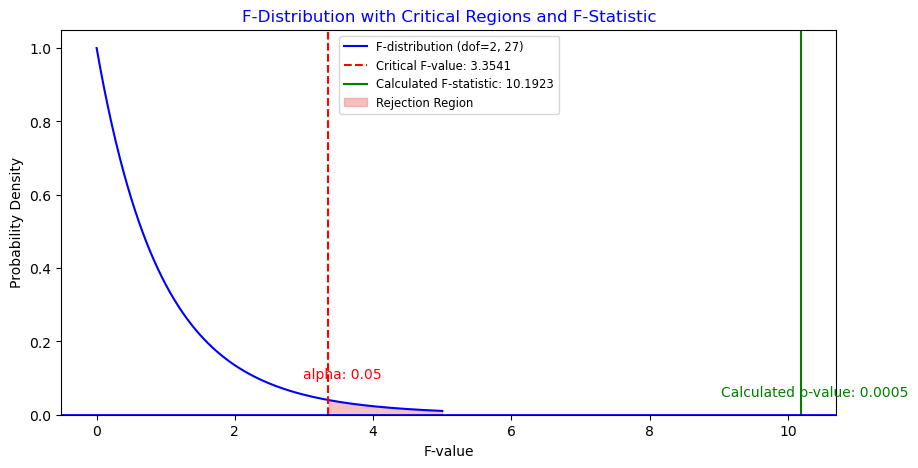

In [99]:
# Extract F-statistic and p-value
f_calculated = anova_test.statistic
p_value = anova_test.pvalue

# Degrees of freedom
k = len(df_1way['group'].unique())  # Number of groups
n = df_1way.shape[0]                # Total number of observations
dof_numerator = k - 1                # Degrees of freedom between groups
dof_denominator = n - k              # Degrees of freedom within groups

# Significance level
alpha = 0.05

# Critical F-value
f_critical = stats.f.ppf(1 - alpha, dof_numerator, dof_denominator)

# Define the range for the F-distribution plot
x = np.linspace(0, 5, 1000)
y = stats.f.pdf(x, dof_numerator, dof_denominator)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the F-distribution
plt.plot(x, y, label=f'F-distribution (dof={dof_numerator}, {dof_denominator})', color='blue')

# Mark the critical F-value
plt.axvline(f_critical, color='red', linestyle='--', label=f'Critical F-value: {f_critical:.4f}')

# Mark the calculated F-statistic
plt.axvline(f_calculated, color='green', linestyle='-', label=f'Calculated F-statistic: {f_calculated:.4f}')

# Fill the rejection region
plt.fill_between(x, 0, y, where=(x >= f_critical), color='lightcoral', alpha=0.5, label='Rejection Region')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Add text for p-value and alpha
plt.text(f_calculated + 0.2, 0.05, f'Calculated p-value: {p_value:.4f}', color='green', fontsize=10, ha='center')
plt.text(f_critical + 0.2, 0.1, f'alpha: {alpha}', fontsize=10, color='red', ha='center')

# Add titles and labels
plt.title('F-Distribution with Critical Regions and F-Statistic', color='blue')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#E51A59; font-size:150%; text-align:center; border-radius:10px 10px;">End of the Session - 06</p>

<p style="text-align: center;"><img src="https://i.ibb.co/TtRtYNn/healthy-lunch.jpg" width="800" height="200" class="img-fluid" alt="Lunch Time"></p>


<p style="text-align: center;"><img src="https://i.ibb.co/99DQ3TY/DS-Courses.png" class="img-fluid" 
alt="CLRSWY"></p>


<br><br><br>

<p style="text-align: center;"><img src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="450" height="200" class="img-fluid" alt="CLRSWY_LOGO"></p>

<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>